### Probability Distribution Exercises

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [12]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=2, size=10000)

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

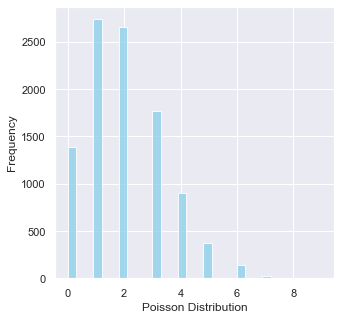

In [17]:
ax = sns.histplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

In [18]:
# What is probability that no cars drive up in the noon hour?

stats.poisson(2).pmf(0)

0.1353352832366127

In [210]:
#Simulation Comparison

data_poisson = poisson.rvs(mu=2, size=100000)
data_poisson

df = pd.DataFrame(data_poisson)

df["data_poisson"] = df.sum(axis=1)
(df.data_poisson == 0).mean(0)

0.1346

In [211]:
# What is the probability that 3 or more cars come through the drive through? 

stats.poisson(2).sf(2)

0.32332358381693654

In [142]:
#Simulation Comparison
(df.data_poisson >= 3).mean(0)

0.3292

In [26]:
# How likely is it that the drive through gets at least 1 car?

stats.poisson(2).sf(0)

0.8646647167633873

In [143]:
#Simulation Comparison
(df.data_poisson >= 1).mean(0)

0.8631

# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?

In [50]:
# What grade point average is required to be in the top 5% of the graduating class? 


μ = 3.0
σ = 0.3

gpa = stats.norm(μ, σ)

top_5_percent_gpa = gpa.isf(.05)
top_5_percent_gpa

3.4934560880854417

In [145]:
#Simulation Comparison

data_normal = np.random.normal(3.0, 0.3, size=(10_000, 1))

df = pd.DataFrame(data_normal)
df

df["data_normal"] = df.sum(axis=1)
(df.data_normal >= 3.49).mean(0)

0.0513

In [215]:
df.quantile(.95).values.min()

5.0

In [51]:
# What GPA constitutes the bottom 15% of the class? 

bottom_15_percent_gpa = gpa.ppf(.15)
bottom_15_percent_gpa

2.689069983151863

In [146]:
#Simulation Comparison

(df.data_normal <= 2.69).mean(0)

0.1548

In [96]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 

bottom_20_percent_gpa = gpa.ppf(.20)
bottom_20_percent_gpa

2.7475136299281258

In [148]:
#Simulation Comparison

(df.data_normal <= 2.745).mean(0)

0.2042

In [97]:
bottom_30_percent_gpa = gpa.ppf(.30)
bottom_30_percent_gpa

2.842679846187588

In [149]:
#Simulation Comparison

(df.data_normal <= 2.843).mean(0)

0.3041

### Would a student with a 2.8 grade point average qualify for this scholarship?
###  Range = 2.74 - 2.84
***
Yes, they would

In [98]:
#If I have a GPA of 3.5, what percentile am I in?

gpa.cdf(3.5)

#percentile = 3.5 / top_gpa
#percentile

0.9522096477271853

In [99]:
gpa.sf(3.5)

0.0477903522728147

In [151]:
#Simulation Comparison

(df.data_normal >= 3.5).mean(0)

0.048

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [219]:
stats.binom(4326, .02).sf(96)

0.1397582363130086

In [165]:
#Simulation Comparison
outcomes = [0,1]

data = np.random.choice(outcomes, size=(100000, 4326), p=[0.98, 0.02])

df = pd.DataFrame(data)
df

df["data"] = df.sum(axis=1)
(df.data >= 97).mean(0)


0.13855

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [220]:
stats.binom(60, 1/100).sf(0)

0.4528433576092388

In [225]:
#Simulation Comparison
outcomes = [0,1]

data = np.random.choice(outcomes, size=(100000, 60), p=[99/100, 1/100])

df = pd.DataFrame(data)
df

df["data"] = df.sum(axis=1)
(df.data >= 1).mean(0)



0.45283

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

In [91]:
# Using 59 to account for the sample size so 90% * (3 cohorts * 22 students)
stats.binom(59, .03).sf(0)


0.8342199288437355

In [168]:
#Simulation Comparison
outcomes = [0,1]

data = np.random.choice(outcomes, size=(100000, 59), p=[0.97, 0.03])

df = pd.DataFrame(data)
df

df["data"] = df.sum(axis=1)
(df.data >= 1).mean(0)



0.83285

In [92]:
#How likely is it that it goes two days without getting cleaned up?

stats.binom(2, .83).pmf(0)

0.02890000000000002

In [175]:
#Simulation Comparison
outcomes = [0,1]

data = np.random.choice(outcomes, size=(100000, 2), p=[0.17, 0.83])

df = pd.DataFrame(data)
df


df["data"] = df.sum(axis=1)
(df.data == 0).mean(0)


0.0289

In [94]:
#How likely is it that it goes all week without getting cleaned up? 

stats.binom(5, .83).pmf(0)

0.00014198570000000012

In [176]:
#Simulation Comparison
outcomes = [0,1]

data = np.random.choice(outcomes, size=(100000, 5), p=[0.17, 0.83])

df = pd.DataFrame(data)
df


df["data"] = df.sum(axis=1)
(df.data == 0).mean(0)

0.0001

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [112]:
μ = 15
σ = 3

ppl_in_line = stats.norm(μ, σ)

under_time_cutoff = ppl_in_line.cdf(17)

under_time_cutoff

0.7475074624530771

In [180]:
#Simulation Comparison

data_normal = np.random.normal(15, 3, size=(10_000, 1))

df = pd.DataFrame(data_normal)
df

df["data_normal"] = df.sum(axis=1)
(df.data_normal <= 17).mean(0)

0.7452

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. 
For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

    What percent of employees earn less than 60,000?
    What percent of employees earn more than 95,000?
    What percent of employees earn between 65,000 and 80,000?
    What do the top 5% of employees make?

In [181]:
import pandas as pd
import numpy as np

In [182]:
from env import host, user, password

In [183]:
def get_db_url(host, user, password, database):
        
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

In [184]:
query = "SELECT avg(salary), stddev(salary) FROM salaries WHERE to_date > now();"

In [185]:
pd.read_sql(query, get_db_url(host,user, password, 'employees'))

,avg(salary),stddev(salary)
0,72012.2359,17309.959336


In [186]:
# What percent of employees earn less than 60,000?

μ = 72012
σ = 17309

salary = stats.norm(μ, σ)

percent = salary.cdf(60000)
percent

0.2438491840795911

#### Comparing in SQL:

    Count of salaries under $60,000 = 64,971
    Total count of salaries = 240,124
    
    Percent under $60K = 27%

In [196]:
#Simulation Comparison

data_normal = np.random.normal(72_012, 17_309, size=(10_000, 1))

df = pd.DataFrame(data_normal)
df

df["data_normal"] = df.sum(axis=1)
(df.data_normal <= 60000).mean(0)

0.2537

In [197]:
# What percent of employees earn more than 95,000?

percent = salary.sf(95000)
percent

0.09207332774098781

In [200]:
#Simulation Comparison

(df.data_normal >= 95000).mean(0)

0.0902

#### Comparing in SQL:
Count of salaries under $95,000 = 26,084 
Total count of salaries = 240,124

Percent over $95K = 10.8%

In [206]:
# What percent of employees earn between 65,000 and 80,000?

percent1 = salary.cdf(65000) #percent that earn less than 65000
percent2 = salary.sf(80000) #percent that earn more than 80000

# to find the percent between the range, subtract the percentage of the range outside from 1
percent = 1 - (percent1 + percent2) 
percent

0.3350785264967915

In [207]:
#Simulation Comparison

((df.data_normal >= 65000) & (df.data_normal <= 80000)).mean(0)

0.3261

#### Comparing in SQL:
Count of salaries between 65K and $85K = 78,066 
Total count of salaries = 240,124

Percent between 65K and 85K = 32.5%

In [208]:
# What do the top 5% of employees make?

top_5_percent = salary.ppf(0.95)
top_5_percent

100482.77142890304

In [209]:
#Simulation Comparison

(df.data_normal >= 100482).mean(0)

0.0509

### FORMATTING
***
<font color=#6495ED> Info</font>

<font color=pink>The text to be show in pink</font>